# FRAUD DETECTION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [19]:
import sys
sys.path.append('../')

data_name = ['creditcard','Fraud_Data','IpAddress_to_Country']
data = {}
for name in data_name:
    data[name] = pd.read_csv(f'../docs/{name}.csv')


In [10]:
data[data_name[1]].head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [12]:
from scripts.analysis import *
info(data[data_name[1]])

Summary Statistics:
              user_id  purchase_value            age    ip_address          class
count  151112.000000   151112.000000  151112.000000  1.511120e+05  151112.000000
mean   200171.040970       36.935372      33.140704  2.152145e+09       0.093646
std    115369.285024       18.322762       8.617733  1.248497e+09       0.291336
min         2.000000        9.000000      18.000000  5.209350e+04       0.000000
25%    100642.500000       22.000000      27.000000  1.085934e+09       0.000000
50%    199958.000000       35.000000      33.000000  2.154770e+09       0.000000
75%    300054.000000       49.000000      39.000000  3.243258e+09       0.000000
max    400000.000000      154.000000      76.000000  4.294850e+09       1.000000
Variance:
 user_id           1.331007e+10
purchase_value    3.357236e+02
age               7.426533e+01
ip_address        1.558745e+18
class             8.487680e-02
dtype: float64
Standard Deviation:
 user_id           1.153693e+05
purchase_value   

In [13]:
check_missing(data[data_name[0]])


Missing Values:
 Series([], dtype: int64)


In [14]:
data[data_name[1]].columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')

In [15]:
for name in data_name:
    data[name] = data[name].drop_duplicates()

data[data_name[1]]['signup_time'] = pd.to_datetime(data[data_name[1]]['signup_time'])
data[data_name[1]]['purchase_time'] = pd.to_datetime(data[data_name[1]]['signup_time'])

data[data_name[0]]['Time'] = pd.to_datetime(data[data_name[0]]['Time'])

data[data_name[1]]['purchase_time'] = pd.to_datetime(data[data_name[1]]['signup_time'])
data[data_name[1]]['purchase_time'] = pd.to_datetime(data[data_name[1]]['signup_time'])


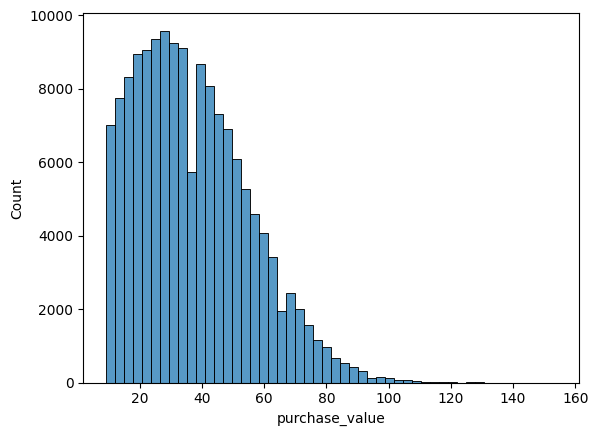

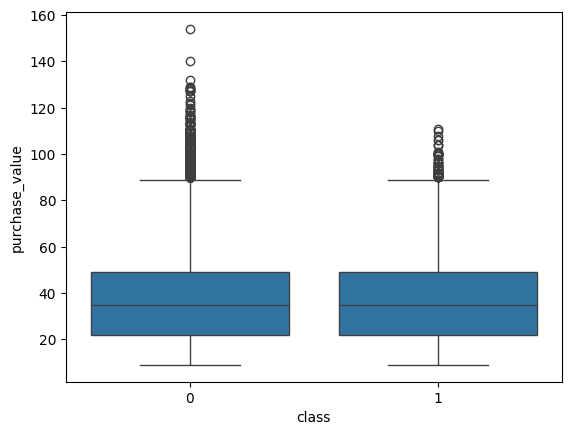

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate analysis
sns.histplot(data[data_name[1]]['purchase_value'], bins=50)
plt.show()

# Bivariate analysis
sns.boxplot(x='class', y='purchase_value', data=data[data_name[1]])
plt.show()


In [11]:
data[data_name[2]]['upper_bound_ip_address'].head()

0    16777471
1    16777727
2    16778239
3    16779263
4    16781311
Name: upper_bound_ip_address, dtype: int64

In [12]:
import ipaddress

def convert_ip_to_int(ip):
    if isinstance(ip, (int, float)):  # Check if the value is already an int or float
        return int(ip)  # Convert float to int if needed
    try:
        return int(ipaddress.IPv4Address(ip))
    except ( ValueError):
        return None  # or -1 or any placeholder for invalid IPs

# Convert IP addresses to integer format with error handling
data[data_name[1]]['ip_address'] = data[data_name[1]]['ip_address'].apply(convert_ip_to_int)
data[data_name[2]]['lower_bound_ip_address'] = data[data_name[2]]['lower_bound_ip_address'].apply(convert_ip_to_int)
data[data_name[2]]['upper_bound_ip_address'] = data[data_name[2]]['upper_bound_ip_address'].apply(convert_ip_to_int)


In [13]:
data[data_name[1]].head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-02-24 22:55:49,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0
1,333320,2015-06-07 20:39:50,2015-06-07 20:39:50,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:44,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1
3,150084,2015-04-28 21:13:25,2015-04-28 21:13:25,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0
4,221365,2015-07-21 07:09:52,2015-07-21 07:09:52,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0


In [ ]:
merged_results = []

for _, bounds_row in data[data_name[2]].iterrows():
    lower_bound = bounds_row['lower_bound_ip_address']
    upper_bound = bounds_row['upper_bound_ip_address']
    
    filtered_ips = data[data_name[1]][
        (data[data_name[1]]['ip_address'] >= lower_bound) & 
        (data[data_name[1]]['ip_address'] <= upper_bound)
    ]
    
    merged_results.append(filtered_ips)

merged = pd.concat(merged_results, ignore_index=True)

merged.drop_duplicates(inplace=True)


In [ ]:
merged.to_csv('Merged_Fraud_Data.csv', index=False)

In [104]:
import pandas as pd
merged_data = pd.read_csv('../docs/Merged_Fraud_Data.csv')
merged_data.count()

user_id                   129146
signup_time               129146
purchase_time             129146
purchase_value            129146
device_id                 129146
source                    129146
browser                   129146
sex                       129146
age                       129146
ip_address                129146
class                     129146
lower_bound_ip_address    129146
upper_bound_ip_address    129146
country                   129146
dtype: int64

In [105]:
merged_data['purchase_time'] = pd.to_datetime(merged_data['purchase_time'])
transaction_frequency = merged_data.groupby('device_id').size().reset_index(name='transaction_frequency')
merged_data = merged_data.merge(transaction_frequency, on='device_id')
merged_data = merged_data.sort_values(by=['user_id', 'purchase_time'])
merged_data['transaction_velocity'] = merged_data.groupby('user_id')['purchase_time'].diff().dt.total_seconds().fillna(0)
merged_data['hour_of_day'] = pd.to_datetime(merged_data['purchase_time']).dt.hour
merged_data['day_of_week'] = pd.to_datetime(merged_data['purchase_time']).dt.dayofweek


In [106]:
merged_data.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'lower_bound_ip_address', 'upper_bound_ip_address', 'country',
       'transaction_frequency', 'transaction_velocity', 'hour_of_day',
       'day_of_week'],
      dtype='object')

In [107]:
merged_data['signup_time'] = pd.to_datetime(merged_data['signup_time'])
merged_data['sex'] = merged_data['sex'].replace({'F': 0, 'M': 1})

/tmp/ipykernel_11539/3502622046.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_data['sex'] = merged_data['sex'].replace({'F': 0, 'M': 1})


>> ### Univariate Analysis

             user_id                    signup_time  \
count  129146.000000                         129146   
mean   200130.920416  2015-04-19 20:20:01.988253440   
min         2.000000            2015-01-01 00:00:42   
25%    100603.250000            2015-02-18 02:07:27   
50%    199971.500000            2015-04-18 21:04:32   
75%    299994.750000  2015-06-18 11:50:54.750000128   
max    400000.000000            2015-08-18 04:40:29   
std    115358.923526                            NaN   

                       purchase_time  purchase_value            sex  \
count                         129146   129146.000000  129146.000000   
mean   2015-06-15 21:00:52.277546496       36.932456       0.584153   
min              2015-01-01 00:00:44        9.000000       0.000000   
25%    2015-04-18 05:24:26.249999872       22.000000       0.000000   
50%              2015-06-18 08:10:14       35.000000       1.000000   
75%       2015-08-17 16:25:27.500000       49.000000       1.000000   
max    

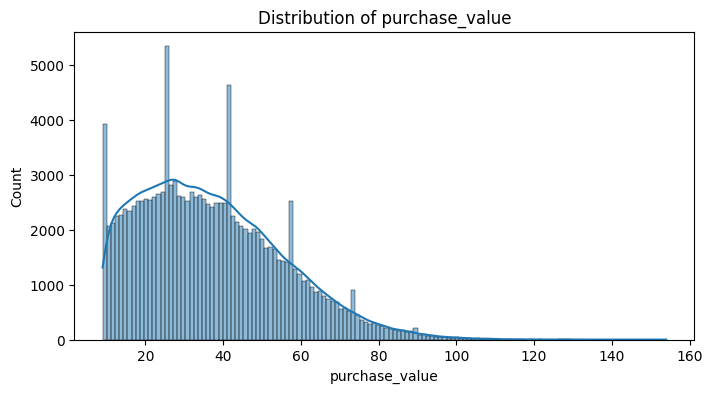

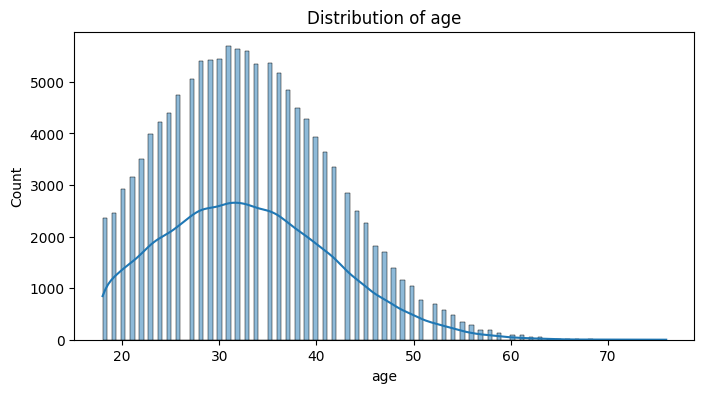

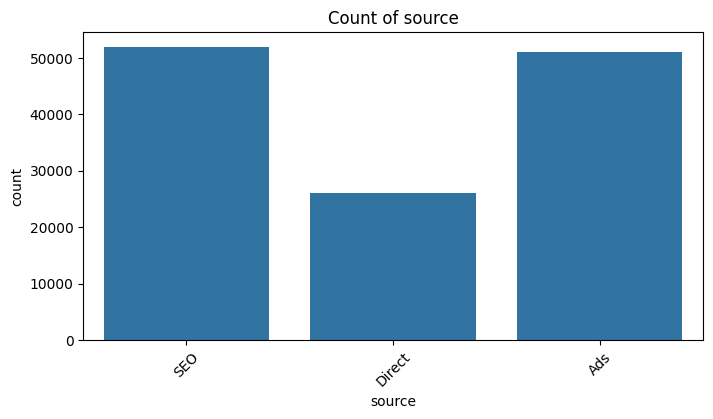

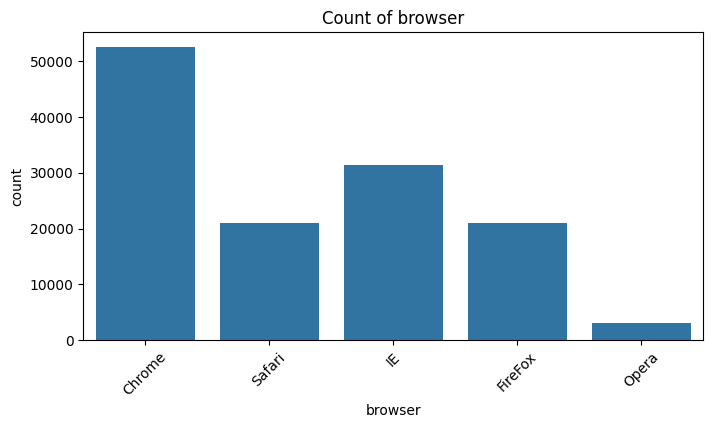

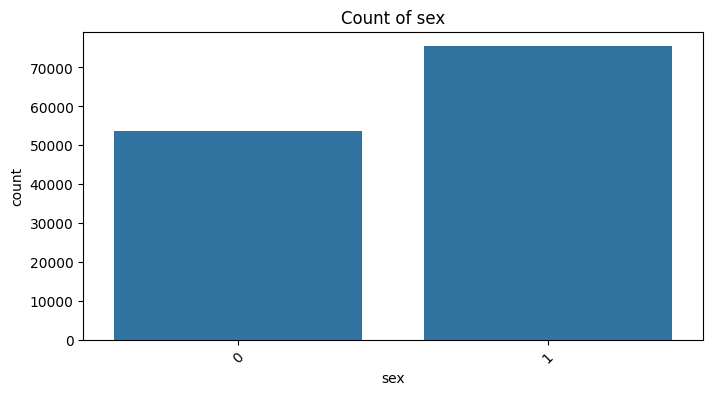

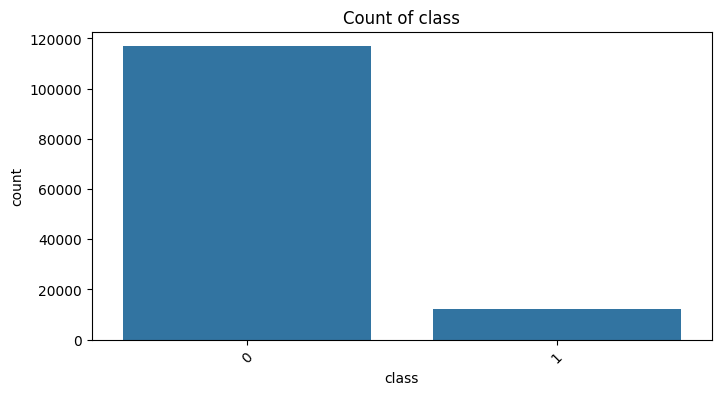

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for numerical columns
print(merged_data.describe())

# Summary statistics for categorical columns
print(merged_data[['source', 'browser', 'sex', 'country', 'device_id','class']].describe())

# Plotting univariate distributions for numerical features
numerical_columns = ['purchase_value', 'age']

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(merged_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Bar plots for categorical features
categorical_columns = ['source', 'browser', 'sex', 'class']

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=merged_data, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()


>> ### Bivariate Analysis

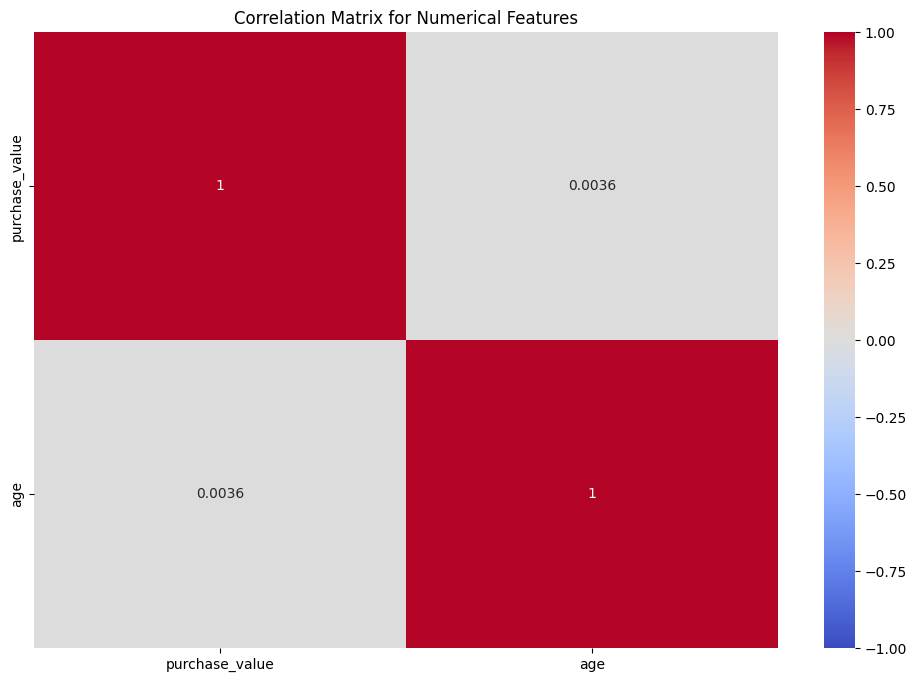

In [109]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(merged_data[numerical_columns].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numerical Features')
plt.show()


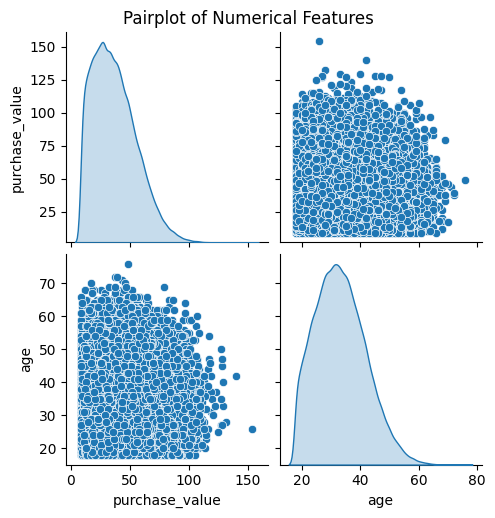

In [110]:
# Scatter plot for numerical features
sns.pairplot(merged_data[numerical_columns], diag_kind='kde')
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()


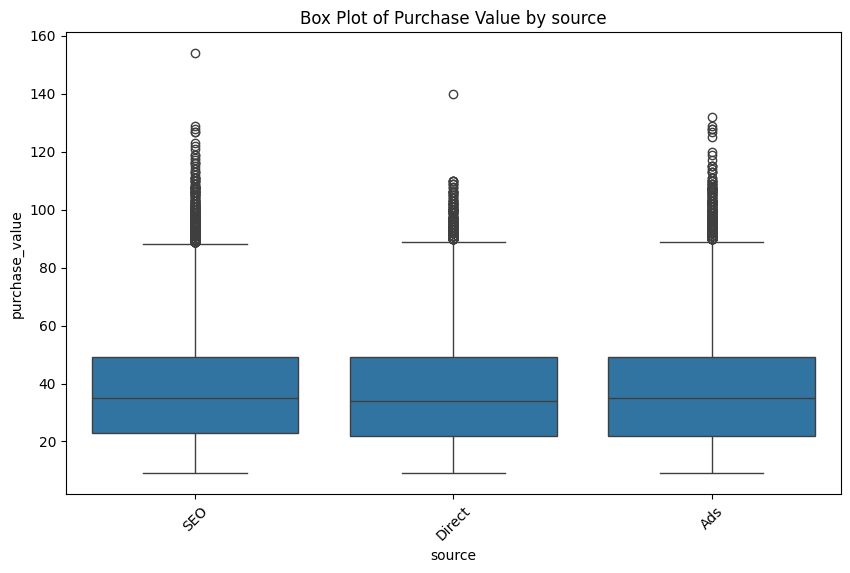

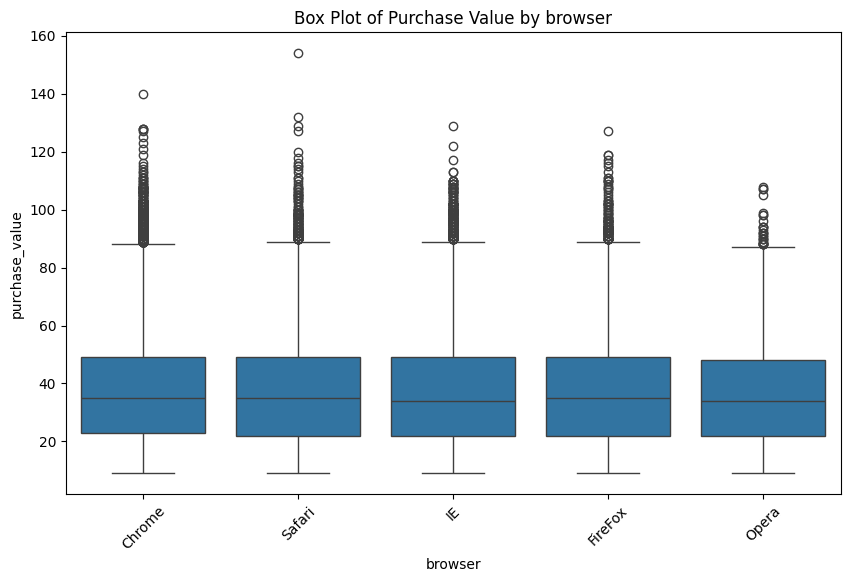

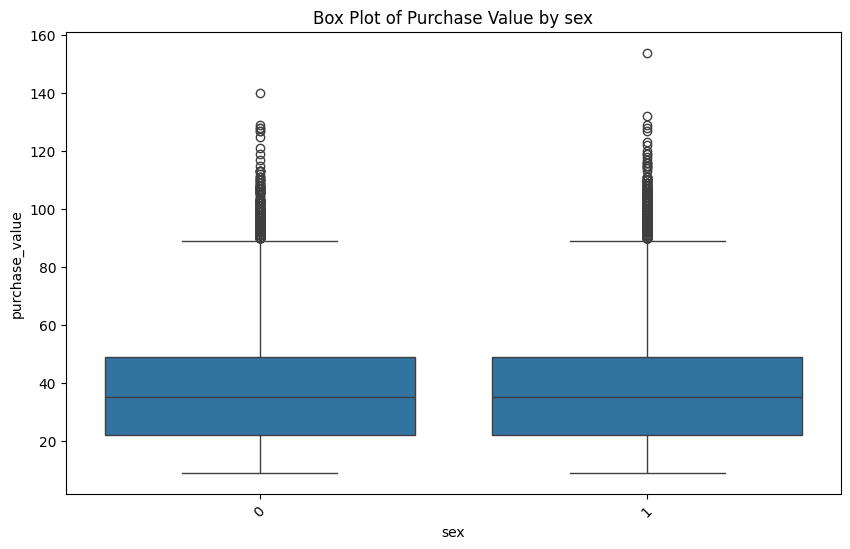

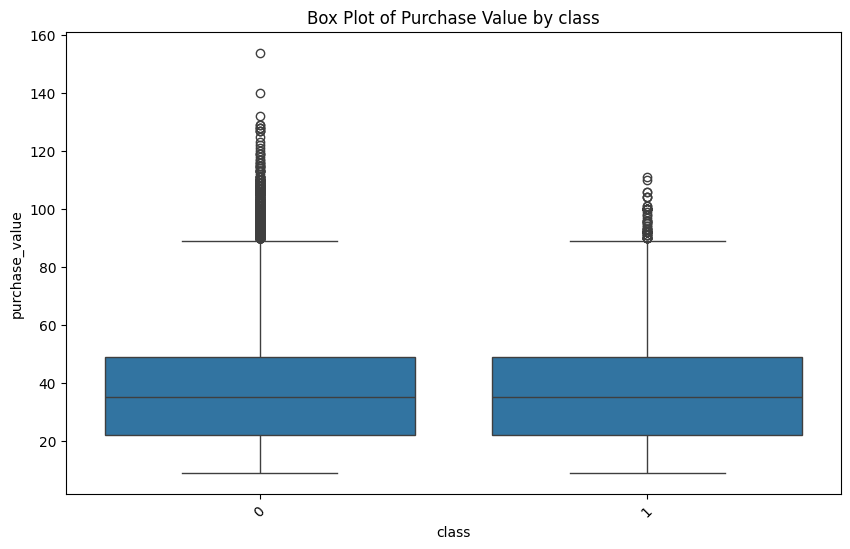

In [111]:
# Box plots for categorical vs numerical
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='purchase_value', data=merged_data)
    plt.title(f'Box Plot of Purchase Value by {col}')
    plt.xticks(rotation=45)
    plt.show()


>> ### Treat Outliers 

In [112]:
for col in merged_data.columns:
    print(f'{col} {merged_data[col].dtype}')

user_id int64
signup_time datetime64[ns]
purchase_time datetime64[ns]
purchase_value int64
device_id object
source object
browser object
sex int64
age int64
ip_address int64
class int64
lower_bound_ip_address int64
upper_bound_ip_address int64
country object
transaction_frequency int64
transaction_velocity float64
hour_of_day int32
day_of_week int32


In [113]:
import numpy as np

def remove_outliers_iqr(df, columns):
    for col in columns:
        if df[col].dtype.kind in 'bifc':  # Only process numeric columns
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            print(f"Processing column: {col}")
            print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

            # Drop outliers
            before_rows = df.shape[0]
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
            after_rows = df.shape[0]
            
            print(f"Removed {before_rows - after_rows} outliers from {col}")

        else:
            print(f"Skipping column: {col} (not numeric)")

    return df

columns_to_check = ['purchase_value', 'age','ip_address',
                    'lower_bound_ip_address','upper_bound_ip_address']

merged_data = remove_outliers_iqr(merged_data, columns_to_check)

Processing column: purchase_value
Lower bound: -18.5, Upper bound: 89.5
Removed 909 outliers from purchase_value
Processing column: age
Lower bound: 9.0, Upper bound: 57.0
Removed 668 outliers from age
Processing column: ip_address
Lower bound: -1815791005.5, Upper bound: 5621546574.5
Removed 0 outliers from ip_address
Processing column: lower_bound_ip_address
Lower bound: -1815773184.0, Upper bound: 5621514240.0
Removed 0 outliers from lower_bound_ip_address
Processing column: upper_bound_ip_address
Lower bound: -1815707649.0, Upper bound: 5621579775.0
Removed 0 outliers from upper_bound_ip_address


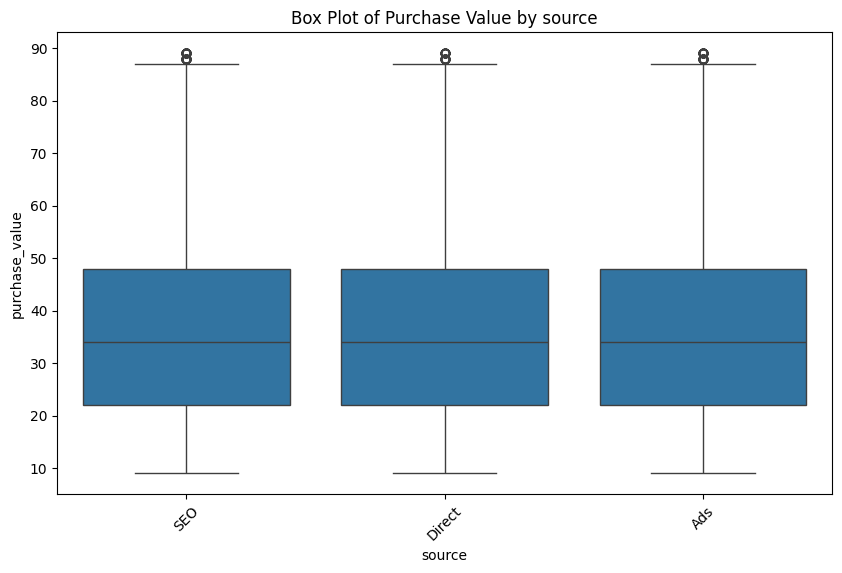

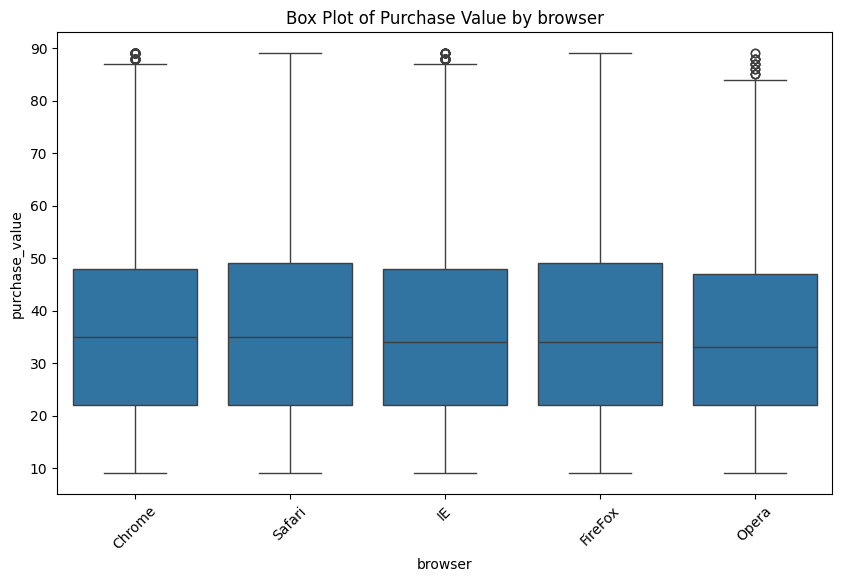

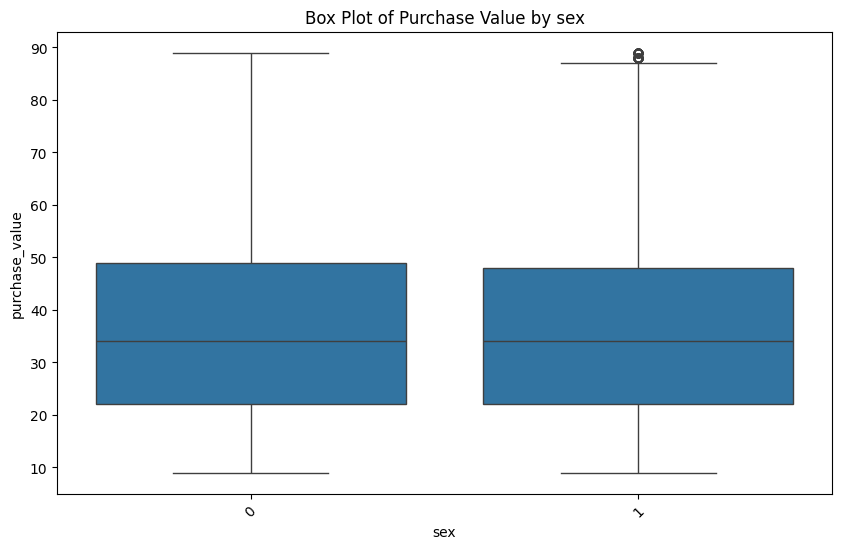

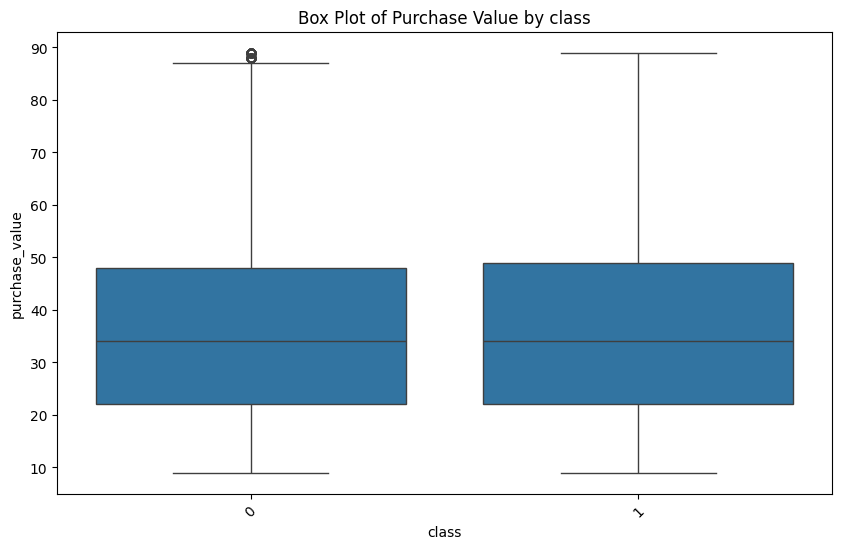

In [114]:
# Box plots for categorical vs numerical
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='purchase_value', data=merged_data)
    plt.title(f'Box Plot of Purchase Value by {col}')
    plt.xticks(rotation=45)
    plt.show()

In [115]:
merged_data['device_id'].nunique()

117036

In [116]:
# merged = merged_data.sort_values(by=['device_id', 'purchase_time'])

# merged['transaction_frequency'] = merged.groupby('user_id')['purchase_time'].transform('count')

# merged['prev_purchase_time'] = merged.groupby('user_id')['purchase_time'].shift(1)
# merged['transaction_velocity'] = (merged['purchase_time'] - merged['prev_purchase_time']).dt.total_seconds().fillna(0)


In [117]:
merged_data.isna().sum()

user_id                   0
signup_time               0
purchase_time             0
purchase_value            0
device_id                 0
source                    0
browser                   0
sex                       0
age                       0
ip_address                0
class                     0
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
transaction_frequency     0
transaction_velocity      0
hour_of_day               0
day_of_week               0
dtype: int64

In [118]:
merged.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,transaction_count,time_since_last_purchase,transaction_frequency,prev_purchase_time,transaction_velocity
29358,226648,2015-05-12 16:00:31,2015-06-13 23:42:18,45,AAALBGNHHVMKG,Direct,Chrome,M,34,2494581089,0,2494562304,2494627839,United Kingdom,1,0.0,1,NaT,0.0
79101,10086,2015-01-02 17:00:43,2015-03-07 20:42:27,21,AABJEESQPJHDQ,SEO,Chrome,M,33,1570352242,0,1570340864,1570373631,Russian Federation,1,0.0,1,NaT,0.0
1779,131014,2015-07-22 20:31:00,2015-08-31 06:30:11,51,AABNLBQBKMWRG,Ads,IE,F,32,821897482,0,805306368,822083583,United States,1,0.0,1,NaT,0.0
109507,288150,2015-06-20 21:05:54,2015-10-11 08:48:43,53,AABOMYDURXEQT,Ads,IE,M,40,2832496843,0,2832465920,2832531455,United States,1,0.0,1,NaT,0.0
103123,90244,2015-03-27 18:49:34,2015-05-11 14:03:40,45,AABOOVEJUXMKC,Direct,IE,M,20,3525232083,0,3525050368,3525312511,China,1,0.0,1,NaT,0.0


In [119]:
# merged_data['time_diff'] = (merged_data['purchase_time'] - merged_data['signup_time']).dt.total_seconds()

# merged_data['transaction_count'] = merged_data.groupby('user_id')['purchase_value'].transform('count')
# merged_data['velocity'] = merged_data['purchase_value'] / merged_data['time_diff']


In [120]:
merged_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,transaction_frequency,transaction_velocity,hour_of_day,day_of_week
99678,2,2015-01-11 03:47:13,2015-02-21 10:03:37,54,FGBQNDNBETFJJ,SEO,Chrome,0,25,880217484,0,872415232,889192447,United States,1,0.0,10,5
12966,4,2015-06-02 16:40:57,2015-09-26 21:32:16,41,MKFUIVOHLJBYN,Direct,Safari,0,38,2785906106,0,2785542144,2786066431,Switzerland,1,0.0,21,5
39370,8,2015-05-28 07:53:06,2015-08-13 11:53:07,47,SCQGQALXBUQZJ,SEO,Chrome,1,25,356056736,0,352321536,369098751,United States,1,0.0,11,3
93110,12,2015-01-10 06:25:12,2015-03-04 20:56:37,35,MSNWCFEHKTIOY,Ads,Safari,1,19,2985180352,0,2985033728,2985295871,Mexico,1,0.0,20,2
1708,16,2015-02-03 13:48:23,2015-03-12 12:46:23,9,FROZWSSWOHZBE,Direct,IE,1,32,578312545,0,570425344,587202559,United States,1,0.0,12,3


In [121]:
merged_data['day_of_week'].unique()

array([5, 3, 2, 4, 0, 6, 1], dtype=int32)

>> ## Handle Cyclical data

In [122]:
import numpy as np
import pandas as pd

# Cyclical encoding hour
merged_data['hour_sin'] = np.sin(2 * np.pi * merged_data['hour_of_day'] / 23)
merged_data['hour_cos'] = np.cos(2 * np.pi * merged_data['hour_of_day'] / 23)

# Cyclical encoding day
merged_data['day_sin'] = np.sin(2 * np.pi * merged_data['day_of_week'] / 6)
merged_data['day_cos'] = np.cos(2 * np.pi * merged_data['day_of_week'] / 6)

merged_data['signup_time'] = pd.to_datetime(merged_data['signup_time'])

merged_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,...,upper_bound_ip_address,country,transaction_frequency,transaction_velocity,hour_of_day,day_of_week,hour_sin,hour_cos,day_sin,day_cos
99678,2,2015-01-11 03:47:13,2015-02-21 10:03:37,54,FGBQNDNBETFJJ,SEO,Chrome,0,25,880217484,...,889192447,United States,1,0.0,10,5,0.398401,-0.917211,-8.660254e-01,0.5
12966,4,2015-06-02 16:40:57,2015-09-26 21:32:16,41,MKFUIVOHLJBYN,Direct,Safari,0,38,2785906106,...,2786066431,Switzerland,1,0.0,21,5,-0.519584,0.854419,-8.660254e-01,0.5
39370,8,2015-05-28 07:53:06,2015-08-13 11:53:07,47,SCQGQALXBUQZJ,SEO,Chrome,1,25,356056736,...,369098751,United States,1,0.0,11,3,0.136167,-0.990686,1.224647e-16,-1.0
93110,12,2015-01-10 06:25:12,2015-03-04 20:56:37,35,MSNWCFEHKTIOY,Ads,Safari,1,19,2985180352,...,2985295871,Mexico,1,0.0,20,2,-0.730836,0.682553,8.660254e-01,-0.5
1708,16,2015-02-03 13:48:23,2015-03-12 12:46:23,9,FROZWSSWOHZBE,Direct,IE,1,32,578312545,...,587202559,United States,1,0.0,12,3,-0.136167,-0.990686,1.224647e-16,-1.0


In [123]:
from sklearn.calibration import LabelEncoder


def encodingCategoricalVariables(dataframe):
    categorical_columns = ['device_id','source','browser','country']
    encoder = LabelEncoder()
    for col in categorical_columns:
        dataframe[col] = encoder.fit_transform(dataframe[col])
    dataframe.drop(columns=categorical_columns, inplace=True)
    
    return dataframe

In [124]:
encoded_dataframe = encodingCategoricalVariables(merged_data)

In [125]:
encoded_dataframe.drop(columns=['signup_time','purchase_time'],inplace=True)

In [134]:
merged_data.to_csv('../docs/encoded_data_scaled.csv')

> # CreditCard Data

In [34]:
creditCardData = pd.read_csv('../docs/creditcard.csv')
creditCardData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [35]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = creditCardData.columns.to_list()

normalizer = MinMaxScaler()

creditCardData_normalized = creditCardData
creditCardData_normalized[columns_to_normalize] = normalizer.fit_transform(creditCardData_normalized[columns_to_normalize])

In [36]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = creditCardData.columns.to_list()
scaler = StandardScaler()

creditCardData_scaled = creditCardData
creditCardData_scaled[columns_to_scale] = scaler.fit_transform(creditCardData_scaled[columns_to_scale])
creditCardData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,-0.041599
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,-0.041599
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,-0.041599
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,-0.041599
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,-0.041599


In [37]:
from sklearn.preprocessing import  LabelEncoder

label_encoder = LabelEncoder()
for column in columns_to_scale:
    creditCardData_scaled[column] = label_encoder.fit_transform(creditCardData_scaled[column])
    creditCardData_normalized[column] = label_encoder.fit_transform(creditCardData_normalized[column])

creditCardData_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,44928,120599,270851,243083,105668,211710,167150,159663,185803,...,140442,174834,90634,147486,160454,105171,218749,102230,13502,0
1,0,190308,160391,134835,182525,151841,161430,120001,155852,112665,...,68639,54299,190891,72302,168529,179871,126158,142841,268,0
2,1,44982,28959,251918,175559,87589,253515,227985,194133,20473,...,223177,233865,269516,36866,68122,117706,81907,61165,23493,0
3,1,67135,107605,252751,68890,143700,244170,166825,214475,24537,...,108399,136591,60398,13166,253297,96705,191339,195684,11549,0
4,2,55018,212082,240745,177861,97922,181139,207795,54735,222386,...,143568,236625,79502,163439,94807,232984,235552,255032,6905,0


In [38]:
creditCardData_scaled.to_csv('../docs/encoded_creditcard_data_scaled.csv')
creditCardData_normalized.to_csv('../docs/encoded_creditcard_data_normalized.csv')

> # Datapreparation

In [1]:
import pandas as pd
encoded_dataframe = pd.read_csv('../docs/encoded_data_scaled.csv')
credit = pd.read_csv('../docs/encoded_creditcard_data_normalized.csv')
encoded_dataframe.head()

,Unnamed: 0,user_id,purchase_value,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,transaction_frequency,transaction_velocity,hour_of_day,day_of_week,hour_sin,hour_cos,day_sin,day_cos
0,99678,2,54,0,25,880217484,0,872415232,889192447,1,0.0,10,5,0.398401,-0.917211,-8.660254e-01,0.5
1,12966,4,41,0,38,2785906106,0,2785542144,2786066431,1,0.0,21,5,-0.519584,0.854419,-8.660254e-01,0.5
2,39370,8,47,1,25,356056736,0,352321536,369098751,1,0.0,11,3,0.136167,-0.990686,1.224647e-16,-1.0
3,93110,12,35,1,19,2985180352,0,2985033728,2985295871,1,0.0,20,2,-0.730836,0.682553,8.660254e-01,-0.5
4,1708,16,9,1,32,578312545,0,570425344,587202559,1,0.0,12,3,-0.136167,-0.990686,1.224647e-16,-1.0


In [160]:
# majority_fraud = fraud[fraud['class']==0]
# minority_fraud = fraud[fraud['class']==1]
# len(minority_fraud)

12117

In [139]:
# from sklearn.utils import resample

# minority_upsampled = resample(minority_fraud, 
#                               replace=True,
#                               n_samples=len(majority_fraud),
#                               random_state=42)

# # Combine majority class with upsampled minority class
# fraud = pd.concat([majority_fraud, minority_upsampled])

In [2]:
print(f"class 1\n{len(encoded_dataframe[encoded_dataframe['class']==1])}\n")
print(f"class 0\n{len(encoded_dataframe[encoded_dataframe['class']==0])}\n")

class 1
12117

class 0
115452



>> ## Feature and Target Separation

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_fraud_data = scaler.fit_transform(encoded_dataframe)
normalized_fraud_dataframe = pd.DataFrame(normalized_fraud_data, columns=encoded_dataframe.columns)

from sklearn.model_selection import train_test_split # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore
X = normalized_fraud_dataframe.drop(columns=['class'])
y = normalized_fraud_dataframe['class']

In [4]:
X_creditcard = credit.drop(columns=['Class', 'Unnamed: 0'])
y_creditcard = credit['Class']

In [5]:
fraud = encoded_dataframe.drop(columns=['Unnamed: 0','user_id'])

In [6]:
fraud.isna().sum()

purchase_value            0
sex                       0
age                       0
ip_address                0
class                     0
lower_bound_ip_address    0
upper_bound_ip_address    0
transaction_frequency     0
transaction_velocity      0
hour_of_day               0
day_of_week               0
hour_sin                  0
hour_cos                  0
day_sin                   0
day_cos                   0
dtype: int64

In [182]:
# fraud_without_class = fraud_without_class.loc[:, ~fraud_without_class.columns.duplicated()]

In [32]:
# fraud_without_class.columns

Index(['purchase_value', 'sex', 'age', 'ip_address', 'class',
       'lower_bound_ip_address', 'upper_bound_ip_address', 'country',
       'transaction_count', 'time_since_last_purchase', 'hour_of_day',
       'day_of_week', 'time_diff', 'velocity', 'hour_sin', 'hour_cos',
       'day_sin', 'day_cos', 'source_Direct', 'source_SEO', 'browser_FireFox',
       'browser_IE', 'browser_Opera', 'browser_Safari'],
      dtype='object')

In [40]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range=(-1, 1))
# X_normalized = scaler.fit_transform(fraud_without_class)

In [46]:
# fraud_norm = pd.DataFrame(X_normalized, columns=fraud_without_class.columns)
# fraud = fraud.reset_index(drop=True)
# fraud_norm = fraud_norm.reset_index(drop=True)


In [7]:
fraud['class'].head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [8]:
X_fraud = encoded_dataframe.drop(columns=['class'])
y_fraud = encoded_dataframe['class']
y_fraud.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

>> ## Train-Test split

In [9]:
from sklearn.model_selection import train_test_split

X_train_credit, X_test_credit, y_train_credit, y_test_credit = train_test_split(X_creditcard, y_creditcard, test_size=0.2, random_state=42)

In [10]:
X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled_fraud = scaler.fit_transform(X_train_fraud)
X_test_scaled_fraud = scaler.transform(X_test_fraud)

> # Model Selection

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [50]:
# model_param = {
#     'LogisticRegression': {
#         'model': LogisticRegression(),
#         'param': {
#             'penalty': ['l1', 'l2', 'elasticnet', None],
#             'C': [0.01, 0.1, 1, 10, 100],
#             'solver': ['liblinear', 'saga'],  # Limited solvers for 'l1' and 'elasticnet' penalties
#             'max_iter': [100, 200, 300]
#         }
#     },
    
    # 'DecisionTreeClassifier': {
    #     'model': DecisionTreeClassifier(),
    #     'param': {
    #         'criterion': ['gini', 'entropy'],
    #         'splitter': ['best', 'random'],
    #         'max_depth': range(2, 10, 2),
    #         'min_samples_split': [2, 5, 10],
    #         'min_samples_leaf': [1, 2, 4]
    #     }
    # },
    
    # 'RandomForestClassifier': {
    #     'model': RandomForestClassifier(),
    #     'param': {
    #         'n_estimators': [10, 50, 100, 130],
    #         'criterion': ['gini', 'entropy'],
    #         'max_depth': range(2, 4, 1),
    #         'max_features': ['auto', 'log2']
    #     }
    # },
    
    # 'GradientBoostingClassifier': {
    #     'model': GradientBoostingClassifier(),
    #     'param': {
    #         'n_estimators': [10, 50, 100, 200],
    #         'learning_rate': [0.01, 0.1, 0.5, 1],
    #         'max_depth': [3, 5, 10],
    #         'subsample': [0.6, 0.8, 1.0]
    #     }
    # },
    
    # 'MLPClassifier': {
    #     'model': MLPClassifier(),
    #     'param': {
    #         'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    #         'activation': ['relu', 'tanh', 'logistic'],
    #         'solver': ['adam', 'sgd'],
    #         'alpha': [0.0001, 0.001, 0.01],
    #         'learning_rate': ['constant', 'adaptive']
    #     }
    # },
    
    # 'XGBClassifier': {
    #     'model': XGBClassifier(objective='binary:logistic'),
    #     'param': {
    #         'learning_rate': [0.5, 0.1, 0.01, 0.001],
    #         'max_depth': [3, 5, 10, 20],
    #         'n_estimators': [10, 50, 100, 200]
    #     }
    # }
# }


In [149]:
# from sklearn.model_selection import GridSearchCV

# scores =[]
# for model_name, mp in model_param.items():
#     model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
#     model_selection.fit(X_fraud,y_fraud)
#     scores.append({
#         'model': model_name,
#         'best_score': model_selection.best_score_,
#         'best_params': model_selection.best_params_
#     })
#     print({
#         'model': model_name,
#         'best_score': model_selection.best_score_,
#         'best_params': model_selection.best_params_
#     })

In [53]:
scores

[{'model': 'LogisticRegression',
  'best_score': 0.5080971659919028,
  'best_params': {'C': 10,
   'max_iter': 200,
   'penalty': 'l1',
   'solver': 'liblinear'}}]

In [12]:
models = {'logistic_model' : LogisticRegression(C=10, max_iter=200, penalty='l1',solver='liblinear'),
'decision_tree_model' : DecisionTreeClassifier(),
'random_forest_model' : RandomForestClassifier(),
'gradient_boosting_model' : GradientBoostingClassifier(),
'mlp' : MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500),
# 'RNN': 'RNN',
# 'LSTM': 'LSTM'
}

>> ## Fraud Data Training

In [169]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, accuracy_score

# log_reg_fraud = LogisticRegression()
# rf_clf_fraud = RandomForestClassifier()


# log_reg_fraud.fit(X_train_scaled_fraud, y_train_fraud)
# rf_clf_fraud.fit(X_train_scaled_fraud, y_train_fraud)

# y_pred_lr = log_reg_fraud.predict(X_test_scaled_fraud)
# y_pred_rf = rf_clf_fraud.predict(X_test_scaled_fraud)


# print("Logistic Regression Report For Fraud Data")
# print(classification_report(y_test_fraud, y_pred_lr))

# print("Random Forest Report For Fraud Data")
# print(classification_report(y_test_fraud, y_pred_rf))

Logistic Regression Report For Fraud Data
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     23117
         1.0       0.91      0.52      0.66      2397

    accuracy                           0.95     25514
   macro avg       0.93      0.76      0.82     25514
weighted avg       0.95      0.95      0.94     25514

Random Forest Report For Fraud Data
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     23117
         1.0       0.91      0.53      0.67      2397

    accuracy                           0.95     25514
   macro avg       0.93      0.76      0.82     25514
weighted avg       0.95      0.95      0.95     25514



In [13]:
import sys
sys.path.append('../')
from sklearn.metrics import classification_report, accuracy_score

from scripts.model_training import *

 
model_training(models,X_train_scaled_fraud,X_test_scaled_fraud,y_train_fraud,y_test_fraud,'fraud')

     

2024-10-26 11:57:05.361241: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-26 11:57:05.364446: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-26 11:57:05.374869: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-26 11:57:05.391976: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-26 11:57:05.396635: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-26 11:57:05.408033: I tensorflow/core/platform/cpu_feature_gu

model training
model testing
logistic_model :
Accuracy:  0.9500274359175355
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     23117
         1.0       0.91      0.52      0.66      2397

    accuracy                           0.95     25514
   macro avg       0.93      0.76      0.82     25514
weighted avg       0.95      0.95      0.94     25514

model training
model testing
decision_tree_model :
Accuracy:  0.9078153170808184
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95     23117
         1.0       0.51      0.58      0.54      2397

    accuracy                           0.91     25514
   macro avg       0.73      0.76      0.74     25514
weighted avg       0.91      0.91      0.91     25514

model training
model testing
random_forest_model :
Accuracy:  0.9506545426040606
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     23117

>> ## CreditCard Data Training

In [14]:
model_training(models,X_train_credit,X_test_credit, y_train_credit,y_test_credit,'credit')


model training
model testing
logistic_model :
Accuracy:  0.999385555282469
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.78      0.81        98

    accuracy                           1.00     56962
   macro avg       0.93      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962

model training
model testing
decision_tree_model :
Accuracy:  0.9990871107053826
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.82      0.75        98

    accuracy                           1.00     56962
   macro avg       0.85      0.91      0.88     56962
weighted avg       1.00      1.00      1.00     56962

model training
model testing
random_forest_model :
Accuracy:  0.9995611109160493
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864


/home/aman/Documents/10Academy/week8&9/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/aman/Documents/10Academy/week8&9/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/aman/Documents/10Academy/week8&9/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

>> ## Chosen models

In [17]:
import joblib
from sklearn.metrics import accuracy_score, roc_auc_score

random_forest_model_credit = joblib.load('../models/random_forest_model+credit.pkl')
random_forest_model_fraud = joblib.load('../models/random_forest_model+fraud.pkl')

In [18]:
y_pred_rf_credit = random_forest_model_credit.predict(X_test_credit)
accuracy_rf_credit = accuracy_score(y_test_credit, y_pred_rf_credit)
roc_auc_rf_credit = roc_auc_score(y_test_credit, random_forest_model_credit.predict_proba(X_test_credit)[:, 1])

print(f"Random Forest Accuracy: {accuracy_rf_credit}")
print(f"Random Forest ROC-AUC: {roc_auc_rf_credit}")

Random Forest Accuracy: 0.9995611109160493
Random Forest ROC-AUC: 0.9526899304319365


In [20]:
y_pred_rf_fraud = random_forest_model_fraud.predict(X_test_scaled_fraud)
accuracy_rf_fraud = accuracy_score(y_test_fraud, y_pred_rf_fraud)
roc_auc_rf_fraud = roc_auc_score(y_test_fraud, random_forest_model_fraud.predict_proba(X_test_scaled_fraud)[:, 1])

print(f"Random Forest Accuracy: {accuracy_rf_fraud}")
print(f"Random Forest ROC-AUC: {roc_auc_rf_fraud}")

Random Forest Accuracy: 0.9506545426040606
Random Forest ROC-AUC: 0.8290571592885073


In [59]:
test_data = pd.read_csv('../docs/encoded_creditcard_data_normalized.csv')
test_data[test_data['Class']==1].head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,541,288,20584,264001,35100,271721,85658,13237,3728,268860,...,260512,130743,14493,184693,144156,194019,246471,30274,0,1
623,623,333,12839,6466,209739,258929,247697,36698,177945,109508,...,265389,194909,272368,79556,192779,116247,23889,176328,26378,1
4920,4920,2742,20715,260841,96988,259299,58760,162167,204217,34149,...,45216,21823,215189,102502,105477,28290,174194,28612,18734,1
6108,6108,3676,6515,249108,10363,262952,37248,6711,2149,59376,...,262932,161103,16460,109521,186929,17078,5397,274335,5852,1
6329,6329,3854,197834,271073,2208,274482,273432,16172,267292,25347,...,26186,45582,7363,3385,274672,238088,125117,236745,99,1


> # Model Explainability

>> ## LIME

In [24]:
from lime.lime_tabular import LimeTabularExplainer
from IPython.core.display import display, HTML

# Change notebook background to white for better visibility
display(HTML("<style>.container { background-color: white; }</style>"))

# Initialize the LIME explainer
explainer = LimeTabularExplainer(X_fraud.values, 
                                  feature_names=X_fraud.columns,
                                  class_names=['Not Fraud', 'Fraud'],
                                  mode='classification')

# Explain the instance
exp = explainer.explain_instance(X_fraud.iloc[0].values, 
                                  random_forest_model_fraud.predict_proba)

# Save the explanation as HTML
html_file = exp.as_html()
with open("lime_explanation.html", "w") as f:
    f.write(html_file)

# Show the explanation in the notebook
exp.show_in_notebook(show_table=True, show_all=True)

/tmp/ipykernel_135102/3927368933.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


In [21]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(X_creditcard.values, 
                                  feature_names=X_creditcard.columns,
                                  class_names=['Not Fraud', 'Fraud'],
                                      mode='classification')

exp = explainer.explain_instance(X_creditcard.iloc[0].values, 
                                  random_forest_model_credit.predict_proba)

exp.show_in_notebook(show_table=True, show_all=False)


/home/aman/Documents/10Academy/week8&9/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
